Algorithm for extracting right fixed length encoding

In [1]:
#Importing libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from string import ascii_letters

In [2]:
#Extract patterns corresponding for each length

def extractor(length,string):    
    i=0
    k=[]
    while i<len(string):
        k.append(tuple(string[i:i+length]))
        i=i+length
    k=set(k)
    return len(k)

In [3]:
#Create list of patterns corresponding to different lengths and total number of possible patterns

def pattern(string):             
    m=[]
    for i in string:
        m.append(i)
    m=set(m)
    m=len(m)
    k=[]
    j=[]
    last=0
    count=0
    x=30
    for i in range(2,x):
        v=extractor(i,string)
        j.append(v)             #Number of unique patterns
        k.append(m**i)          #Total Number of possible patterns
    return j,k


In [4]:
#Find the point of maximum increase

def max_increase(seq):          
    i = 0
    maximum_increase = 0
    ind=0
    difference=0
    for i in range(1,len(seq)):
        difference = seq[i]-seq[i-1]
        if difference>maximum_increase:
            maximum_increase=difference
            ind=i
    return ind+2

In [5]:
#Plot the Compactness score

def plot(string,start,stop):         
    one,two=pattern(string)
    stop=min(stop+1,len(one))
    one=one[start:stop]
    two=two[start:stop]
    m=1-np.divide(one,two)
    x=max_increase(m)
    fig = plt.figure(figsize=(15,6))
    ax = fig.add_subplot(111)
    ax.plot(np.linspace(2,len(one)+1,len(one)),one, '-', color='blue',label = 'Number of unique patterns',marker='.')
    ax.set_xticks(np.linspace(2,len(one)+1,len(one)))
    ax.axvline(x=x)
    ax2 = ax.twinx()
    ax2.plot(np.linspace(2,len(one)+1,len(one)),(1-np.divide(one,two)), '-r', label = 'Compactness Score')
    ax2.axhline(y=len(string), color='purple', linestyle='-.')
    ax2.set_ylim([0,1.10])
    ax.legend(loc=7)
    ax2.legend(loc=6)
    ax.grid()
    ax.set_xlabel("Length of Pattern")
    ax.set_ylabel('Number of unique patterns')
    ax2.set_ylabel('Number of possible patterns')
    plt.title('Maximum Information with minimum representation occurs at pattern length '+str(x))
    plt.show()

In [6]:
#Text to Binary Converter

def text_transform(text):           
    m=''
    for i in text:
        
        p=str(bin(ord(i)).replace("b", ""))
        if len(p)<=8:
            p='0'*(8-len(p))+p
        else:
            p=p[1:]
        m+=str(p)
        if len(m)%8!=0:
            print(i,p[0])
            break
    return m

### Text Data Plot

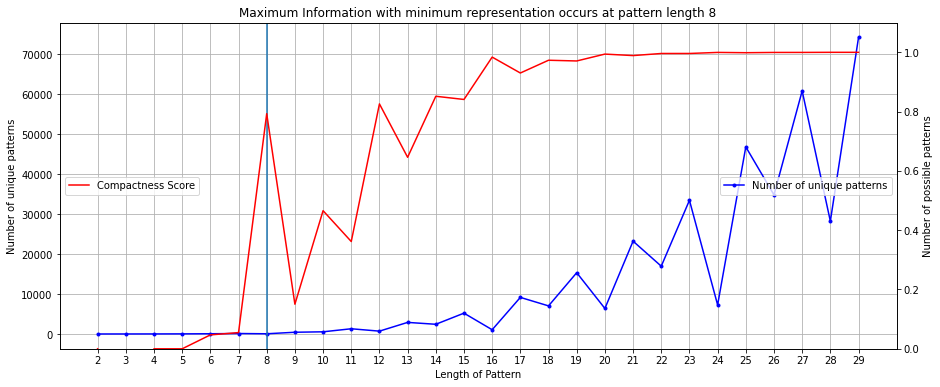

In [8]:
x=pd.read_csv('brown.csv')
text3=''
for i in x.tokenized_text[:10000]:
    text3+=i

allowed = set(ascii_letters + ' ')
answer = ''.join(l for l in text3 if l in allowed)
answer=answer.replace('  ',' ')

text=answer
plot(text_transform(text),0,100)